In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("HR_comma_sep.csv.crdownload", encoding = 'utf-8')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Clean DF

In [4]:
def reading_cleaning(df):
    sal={
        'high':3,
        'medium':2,
        'low':1,
        'h':3,
    }

    df['num_salary']=df.salary.apply(lambda x: sal[x])
    cols=df.columns.tolist()
    cols.insert(len(cols),cols.pop(cols.index('left')))
    df=df[cols]
    df.columns=[x.lower() for x in cols]
    df.drop_duplicates(inplace=True)
    
    return df
df = reading_cleaning(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_10672\1387861399.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,num_salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,0,sales,medium,2,1
2,0.11,0.88,7,272,4,0,0,sales,medium,2,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,0,sales,low,1,1


## EverationEmployee Details

In [6]:
def employee_important_info(df):
    # Average satisfaction level
    average_satisfaction = df['satisfaction_level'].mean()
    # Department-wise average satisfaction level
    department_satisfaction = df.groupby('department')['satisfaction_level'].mean()
    # Salary-wise average satisfaction level
    salary_satisfaction = df.groupby('salary')['satisfaction_level'].mean()

    # Employees who left
    left_employees = len(df[df['left'] == 1])
    # Employees who stayed
    stayed_employees = len(df[df['left'] == 0])
    
    return average_satisfaction,department_satisfaction,salary_satisfaction,left_employees,stayed_employees

In [7]:
average_satisfaction,department_satisfaction,salary_satisfaction,left_employees,stayed_employees = employee_important_info(df)

In [8]:
print("Average Satisfaction Level:", average_satisfaction)
print("Department-wise Average Satisfaction Level:\n", department_satisfaction)
print("Salary-wise Average Satisfaction Level:\n", salary_satisfaction)
print("Employees who left:\n", left_employees)
print("Employees who stayed:\n", stayed_employees)

Average Satisfaction Level: 0.6025083272990586
Department-wise Average Satisfaction Level:
 department
IT             0.596568
RandD          0.606976
accounting     0.578370
hr             0.595282
management     0.599833
marketing      0.605653
product_mng    0.607022
sales          0.601585
support        0.614926
technical      0.601670
Name: satisfaction_level, dtype: float64
Salary-wise Average Satisfaction Level:
 salary
h         0.240000
high      0.627799
low       0.592670
medium    0.610444
Name: satisfaction_level, dtype: float64
Employees who left:
 1991
Employees who stayed:
 4914


## Pie Plot for employee different features

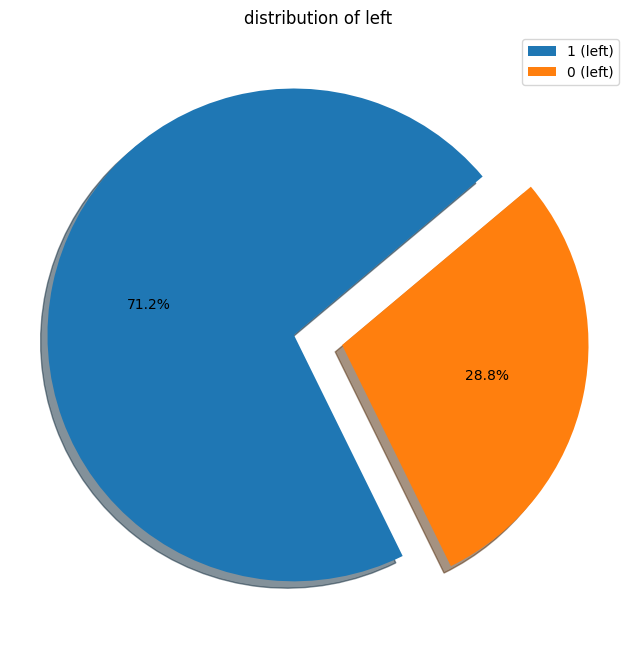

In [9]:
def plots(df,col):
    values = df[col].unique()
    plt.figure(figsize=(15,8))
    
    explode = [0.1 if len(values) >1 else 0] * len(values)
    plt.pie(df[col].value_counts(),explode=explode,startangle=40,autopct='%1.1f%%',shadow=True)
    labels = [f'{value} ({col})' for value in values]
    plt.legend(labels=labels,loc='upper right')
    
    plt.title(f"distribution of {col}")
    plt.show()
    
plots(df,'left')

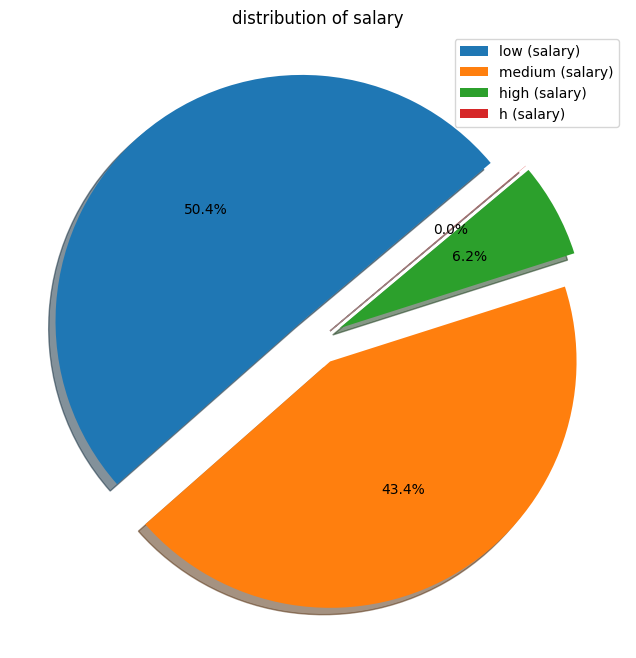

In [10]:
plots(df,'salary')

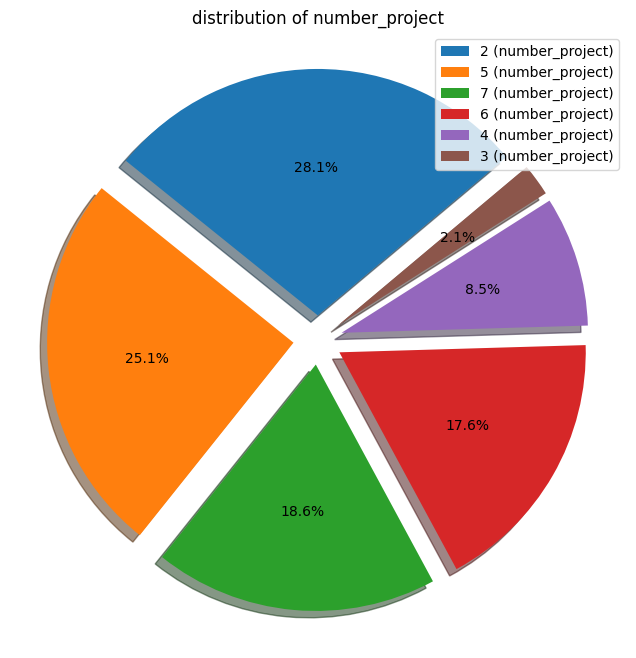

In [11]:
plots(df,'number_project')

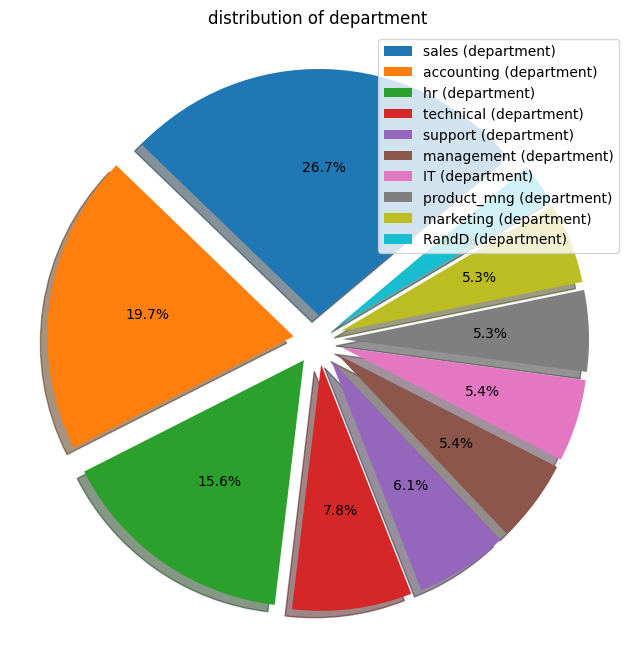

In [12]:
plots(df,'department')

## Employee Distribution

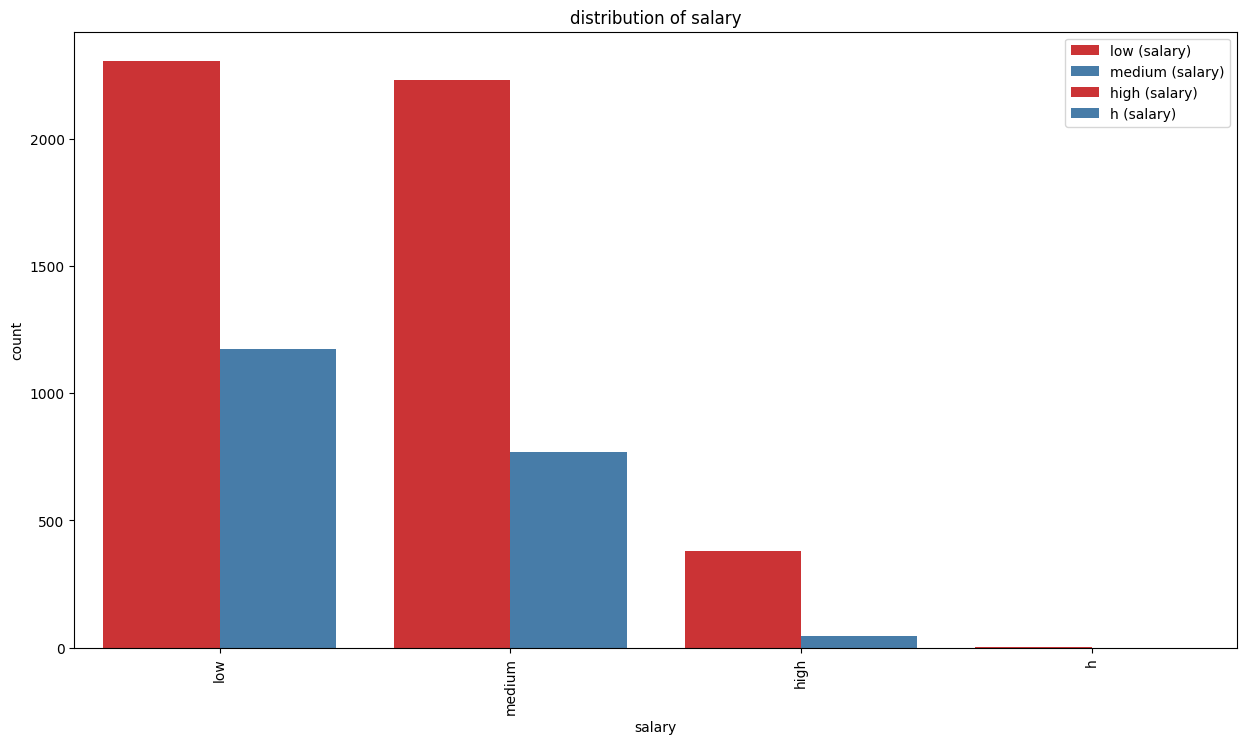

In [13]:
def distribution(df,col):
    values = df[col].unique()
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[col],hue='left',palette='Set1',data=df)
    labels = [f"{val} ({col})" for val in values]
    plt.legend(labels=labels,loc="upper right")
    plt.title(f"distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()
distribution(df,'salary')

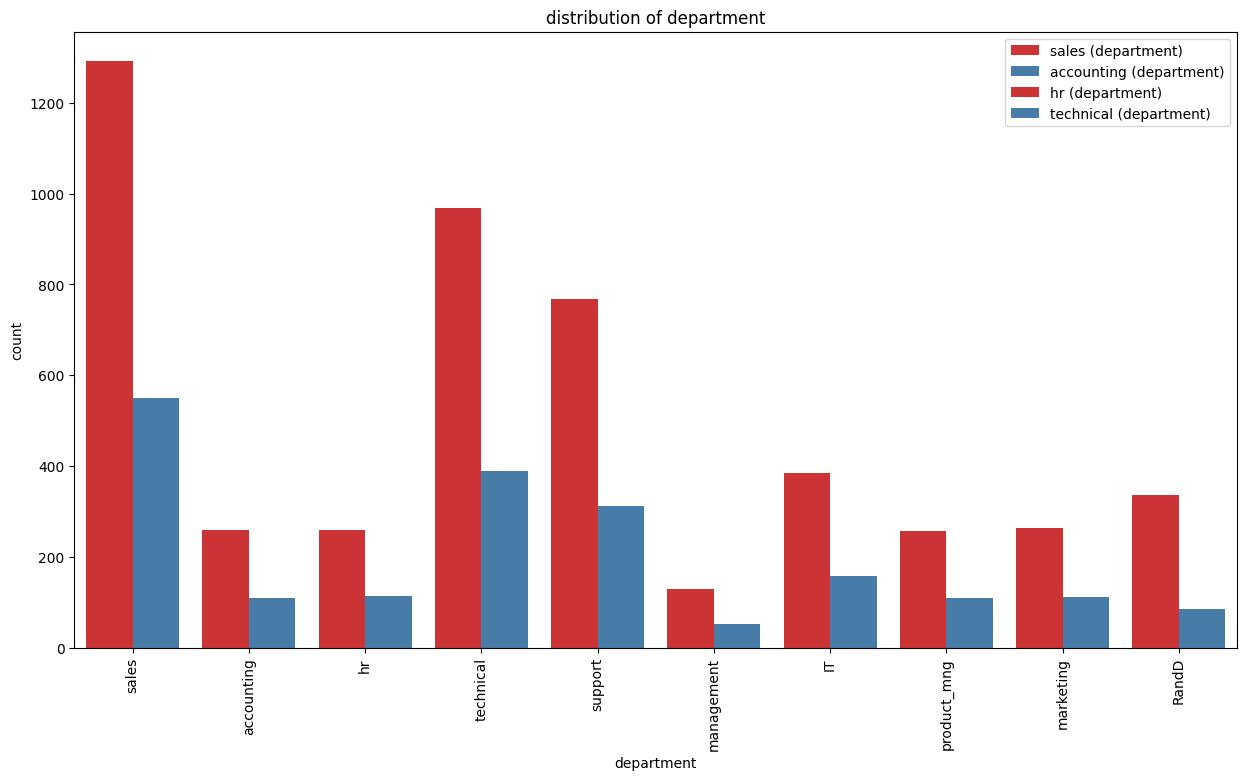

In [14]:
distribution(df,'department')

## Comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_10672\179754391.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x,y=y,hue='left',data=df,ci=None)


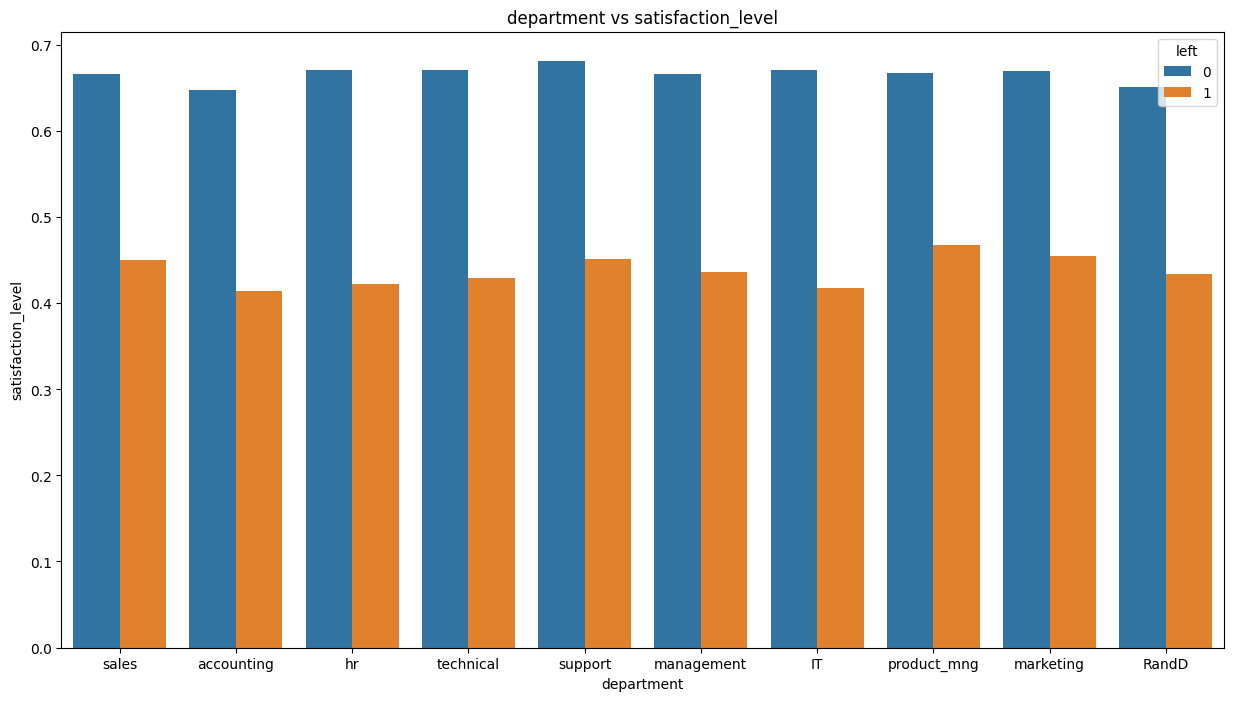

In [15]:
def comparison(df,x,y):
    plt.figure(figsize=(15,8))
    sns.barplot(x=x,y=y,hue='left',data=df,ci=None)
    plt.title(f'{x} vs {y}')
    plt.show()
comparison(df,'department', 'satisfaction_level')

## Feature Left Correlation

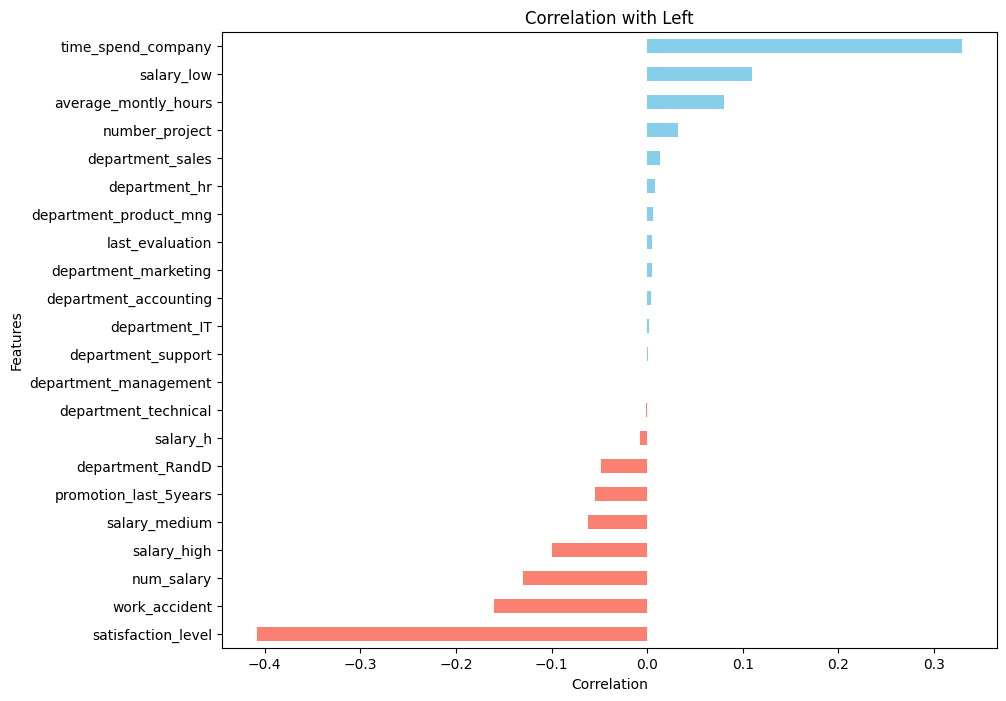

In [18]:
def corr_with_left(df):
    df_encoded = pd.get_dummies(df)
    correlation = df_encoded.corr()['left'].sort_values()[:-1]
    colors = ['skyblue' if corr>=0 else 'salmon' for corr in correlation]
    plt.figure(figsize=(10,8))
    correlation.plot(kind='barh', color=colors)
    # Add title and labels
    plt.title('Correlation with Left')
    plt.xlabel('Correlation')
    plt.ylabel('Features')

    # Show the plot
    plt.show()
corr_with_left(df)

## Employee Churn Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_10672\160058733.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])


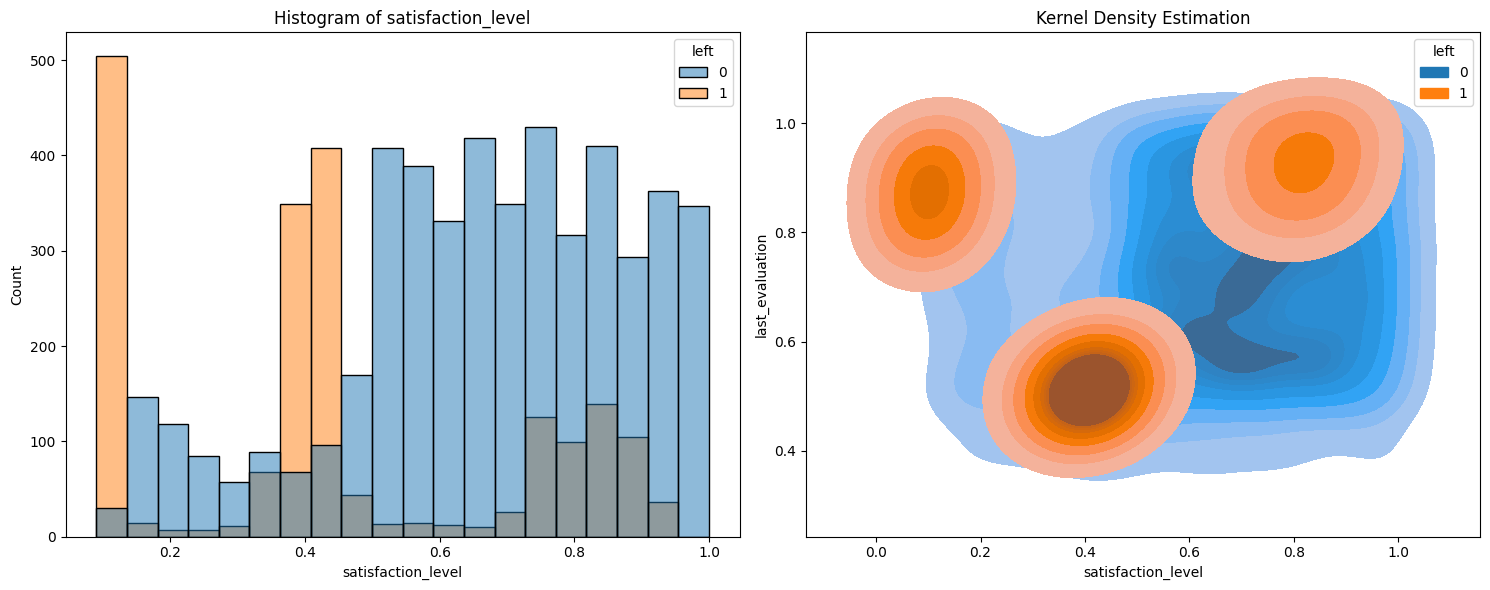

In [19]:
def histogram(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a grid of 1 row and 2 columns

    # Plot the first histogram
    sns.histplot(data=df, x=col, hue='left', bins=20, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    # Plot the second histogram
    sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])
    axes[1].set_title("Kernel Density Estimation")

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()

histogram(df, 'satisfaction_level')

## Kmeans Clustering

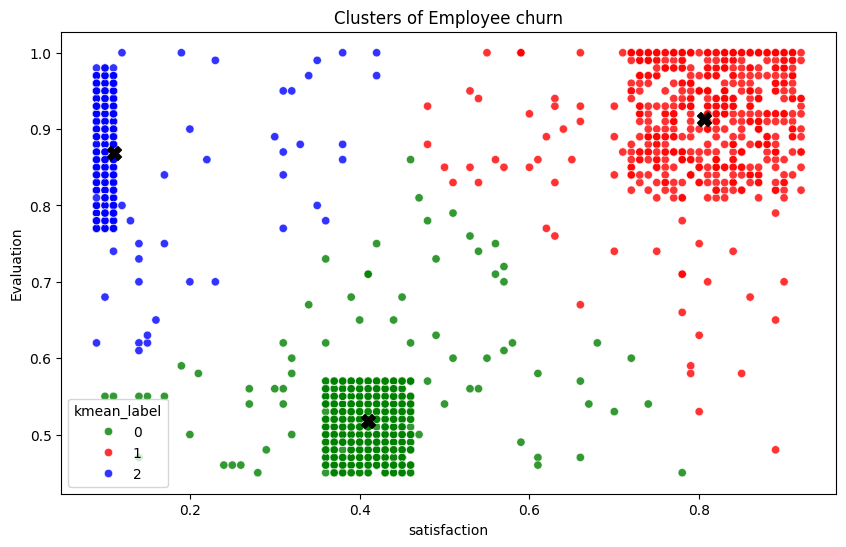

In [20]:
from sklearn.cluster import KMeans
def leftKmeans(df):
    df1=df[df.left==1].copy()
    df1 = pd.get_dummies(df1)
    kmeans = KMeans(n_clusters=3,random_state=2)
    df1['kmean_label']=kmeans.fit_predict(df1[["satisfaction_level","last_evaluation"]])

    fig = plt.figure(figsize=(10, 6))
    sns.scatterplot(x='satisfaction_level',y='last_evaluation',data=df1,
                    hue='kmean_label',palette=['g','r','b'],alpha=0.8)
    plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
                color="black",marker="X",s=100)
    plt.xlabel("satisfaction")
    plt.ylabel("Evaluation")
    plt.title("Clusters of Employee churn")
    plt.show()
    
    return df1


df1 = pd.DataFrame()
df1 = leftKmeans(df)

In [21]:
df1.groupby('kmean_label').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,num_salary,left,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
kmean_label,,,,,,,,,,,,,,,,,,,,,
0,0.410133,0.517195,2.172949,149.640798,3.065410,0.053215,0.005543,1.436807,1.0,0.080931,...,0.066519,0.025499,0.063193,0.056541,0.291574,0.145233,0.179601,0.028825,0.592018,0.379157
1,0.805874,0.912577,4.511712,242.003604,5.012613,0.052252,0.003604,1.430631,1.0,0.070270,...,0.045045,0.025225,0.055856,0.063063,0.277477,0.178378,0.189189,0.019820,0.589189,0.390991
2,0.111199,0.869064,6.119850,271.840824,4.084270,0.052434,0.001873,1.434457,1.0,0.086142,...,0.052434,0.028090,0.044944,0.044944,0.249064,0.153558,0.230337,0.020599,0.586142,0.393258
